In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [3]:
x = np.random.random_sample((10,)) * 90
for i in range(10):
    x = np.append(x, x + random.uniform(0, 1))
x = np.append(x, np.random.normal(0, 40, 30))


y = np.random.random_sample((10,)) * 90  
for i in range(10):
    y = np.append(y, y+random.uniform(0, 1))

y = np.append(y, np.random.normal(0, 40, 30))

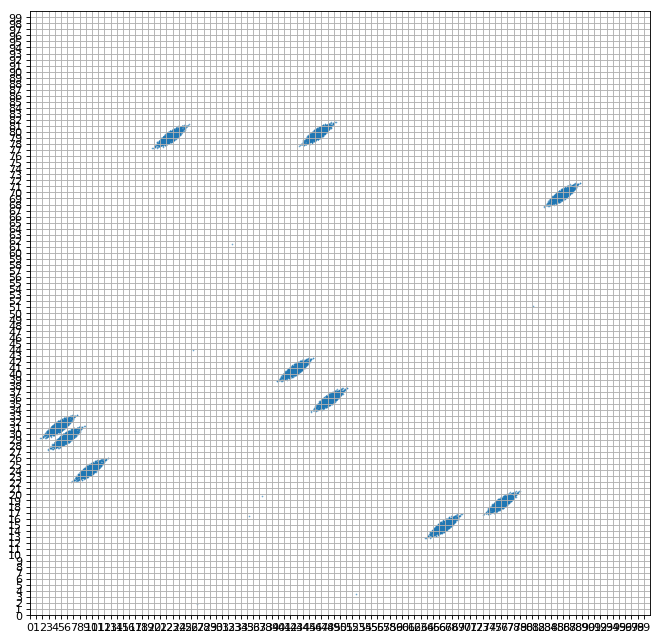

In [4]:
# This part is  a visualization only 
grid_size= 1

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.gca()
ax.set_xticks(np.arange(0, 100, grid_size))
ax.set_yticks(np.arange(0, 100, grid_size))

# plt.grid()
# plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.scatter(x, y, s=0.1)

# Limit the axixs for visualization puroposes only
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()

plt.show()

In [5]:
cellSize=1
minValue=0
maxValue=100

# We divid the array by cell size and calculate the 
# for x 
x1= np.remainder(x , cellSize)
print(x)
print(x1)
xTransformed = x - x1
print(xTransformed)

print(x.size)

print(xTransformed.size)

# for y 
y1= np.remainder(y , cellSize)
yTransformed = y - y1
# print(yTransformed.size)


# agg = np.array(list(zip(xTransformed, yTransformed)))
# agg = np.column_stack((xTransformed, yTransformed))
# print(agg)


# np.array(setAgg[:,0], setAgg[:,1])

# setAgg=np.unique(agg, axis=0)

# print(setAgg.size)
# print(setAgg)

# plt.scatter(setAgg[:,0], setAgg[:,1])

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)
# plt.xlim(0, 100)
# plt.ylim(0, 100)
# plt.show()

[ 19.72340088  43.38259636  73.11116407 ... -12.70015923  16.29902346
 -23.33037483]
[0.72340088 0.38259636 0.11116407 ... 0.29984077 0.29902346 0.66962517]
[ 19.  43.  73. ... -13.  16. -24.]
10270
10270


In [6]:
all_tuples = tuple(map(tuple, np.column_stack((xTransformed, yTransformed))))

dictCount={} 

for i in all_tuples:
    if(i in dictCount):
        dictCount[i] += 1
    else:
        dictCount[i] = 1


# print(dictCount)
# print(dictCount.values())
# values = np.asarray(dictCount.values())

values = np.fromiter(dictCount.values(), dtype=int)
# print(values.shape)
# print(values)



keys = np.asarray(list(dictCount))
# print(keys)
print(keys.shape)

(205, 2)


In [7]:
# How to convert 

# https://stackoverflow.com/questions/23668509/dictionary-keys-and-values-to-separate-numpy-arrays
# Dictionary keys and values to separate numpy arrays
# keys = np.fromiter(Samples.keys(), dtype=float)
# vals = np.fromiter(Samples.values(), dtype=float)


values_cliped = (values - 30).clip(min=0)
print(values_cliped)

print(np.where( values_cliped !=0 ))


dataForClustering=keys[np.where( values_cliped !=0 )]
print(keys)

# sorted = dataForClustering[dataForClustering[:,0].argsort()[::1]]

# print(sorted)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   6  12   0   0
   0   0   0   0  65   0  17  65   0   0   0   0   0   0   8   0 117  41
  67 125  54 103  79  87  66   7  62 100  16  34   0   0   0 122 105   0
 107 153   0 142 180 207 159 216 216 188 169 183   0   0   0  81   0   0
   0  63  42   3   2 186 184 183 149 145 163  68 162  87 108   1  14  15
 145  17   4   0 152   0   0   0   0 101 107 109 138 130   0 123  90   0
   3  32 107   0  39  50  62  42  19  73  45   0  60   0  64  38   0   0
   0   0   0  27  58   0   0   0   0   0   0   0   0   0   0  25   0   0
   0   0   5   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
(array([ 14,  15,  22,  24,  25,  32,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  51,  52,  54,  55,  57,  58,
        59,  60,  61, 

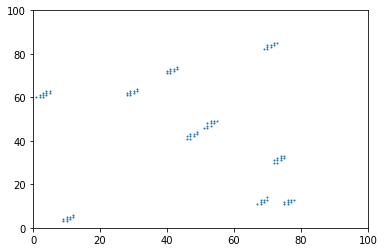

In [7]:
plt.scatter(dataForClustering[:,0], dataForClustering[:,1], s=1)

# Limit the axixs for visualization puroposes only
# plt.xlim(minValue/cellSize, maxValue/cellSize)
# plt.ylim(minValue/cellSize, maxValue/cellSize)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

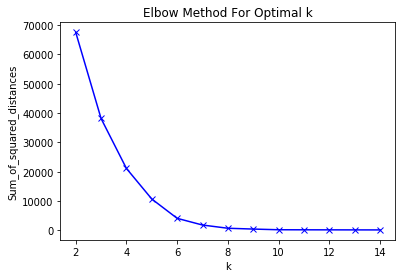

10
[[29.44444444 62.33333333]
 [73.5        31.5       ]
 [70.88888889 83.55555556]
 [10.44444444  4.33333333]
 [47.44444444 42.33333333]
 [68.625      12.375     ]
 [ 3.27272727 61.36363636]
 [41.44444444 72.33333333]
 [52.9        47.7       ]
 [76.25       12.125     ]]


In [8]:
Sum_of_squared_distances = []


K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10, random_state=0)
    km = km.fit(dataForClustering)
    Sum_of_squared_distances.append(km.inertia_)

# print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k=1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # print(ratio)
    # 1.4 here is just a threshhold 
    if(ratio < 1.3):
        k=i+1
        break
        
print(k)


# final run with large iterations 
km = KMeans(n_clusters=k, max_iter=100, random_state=0)
km = km.fit(dataForClustering)
print(km.cluster_centers_)
